### This is Assignment1 Part2 for EE214 Machine Learning Basics and Practices.
Euiseok Han, 20200690\
Date: 040925

I utilized the given skeleton code.

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_excel('Concrete_Data.xls')
print(data.head())

# Preprocess the data
X = data.drop('Concrete compressive strength(MPa, megapascals) ', axis=1).values
X_cement = data['Cement'].values
X_blast_furnace_slag = data['Blast Furnace Slag'].values
X_fly_ash = data['Fly Ash'].values
X_water = data['Water'].values
X_superplasticizer = data['Superplasticizer'].values
X_coarse_aggregate = data['Coarse Aggregate'].values
X_fine_aggregate = data['Fine Aggregate'].values
X_age = data['Age'].values
y = data['Concrete compressive strength(MPa, megapascals) '].values # Concrete compressive strength becomes our target value

# ----- Standardize features -----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----- Split the data -----
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 0)


   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  \
0            1040.0           676.0   28   
1            1055.0           676.0   28   
2             932.0           594.0  270   
3             932.0           594.0  365   
4             978.4           825.5  360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075  


In [79]:
# (a) Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
degrees = [i for i in range(10)]
poly_train_errors = []
poly_test_errors = []

for degree in degrees:
    # ----- Blank : Transform features into polynomial features -----
    # Create a PolynomialFeatures object with the given degree (include bias term)
    # Transform both the training and test data

    # TODO : Fill in the code below
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    
    # ----- Blank : Fit linear regression model and evaluate performance -----
    # TODO :
    # - Initialize and train LinearRegression model
    # - Predict on both training and test sets
    # - Compute train and test MSE
    # - Append errors to respective lists

    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)
    y_train_pred = model_poly.predict(X_train_poly)
    y_test_pred = model_poly.predict(X_test_poly)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    poly_train_errors.append(train_mse)
    poly_test_errors.append(test_mse)
    print(f'train_mse: {train_mse:.6f}, test_mse: {test_mse:.6f}, degree: {degree}')


train_mse: 282.264844, test_mse: 265.384493, degree: 0
train_mse: 110.345501, test_mse: 95.635335, degree: 1
train_mse: 51.806059, test_mse: 62.276942, degree: 2
train_mse: 19.157329, test_mse: 51.114772, degree: 3
train_mse: 4.755054, test_mse: 8813.656885, degree: 4
train_mse: 1.879642, test_mse: 875857622.315665, degree: 5
train_mse: 1.030233, test_mse: 5754527291.977926, degree: 6
train_mse: 1.027273, test_mse: 1123142475.807680, degree: 7
train_mse: 1.027147, test_mse: 609456717.981416, degree: 8
train_mse: 1.027147, test_mse: 8513868999.921293, degree: 9


265.384492976117 0
train_mse: 282.264844, test_mse: 265.384493, degree: 0
251.51060401877635 1
train_mse: 270.424681, test_mse: 251.510604, degree: 1
200.36467060499027 2
train_mse: 230.119124, test_mse: 200.364671, degree: 2
195.46856608024183 3
train_mse: 227.459204, test_mse: 195.468566, degree: 3
180.9636823777833 4
train_mse: 220.603927, test_mse: 180.963682, degree: 4
179.83697366373116 5
train_mse: 220.181038, test_mse: 179.836974, degree: 5
180.13000849667296 6
train_mse: 217.225726, test_mse: 180.130008, degree: 6
179.6671738641826 7
train_mse: 217.108361, test_mse: 179.667174, degree: 7
182.19698200664354 8
train_mse: 213.277601, test_mse: 182.196982, degree: 8
182.72073239283083 9
train_mse: 213.220469, test_mse: 182.720732, degree: 9


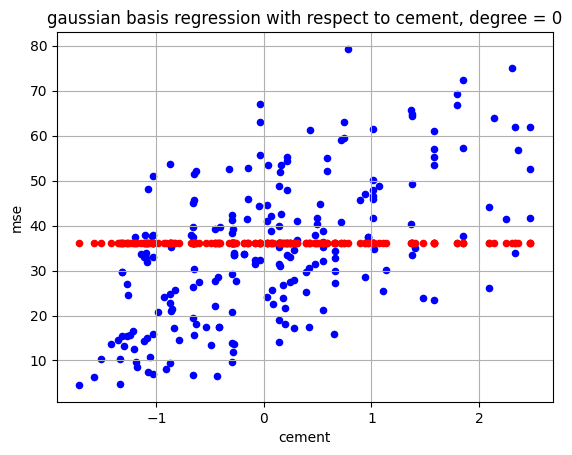

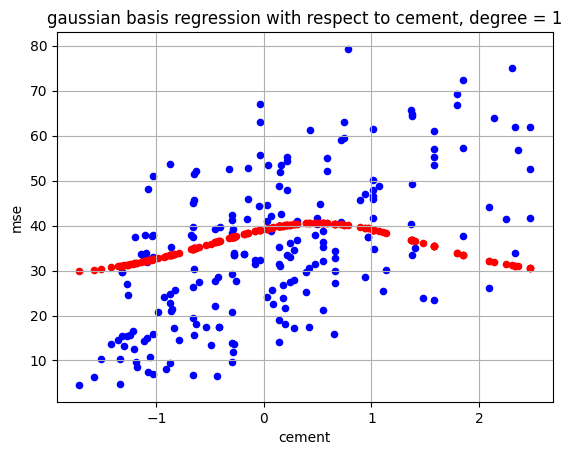

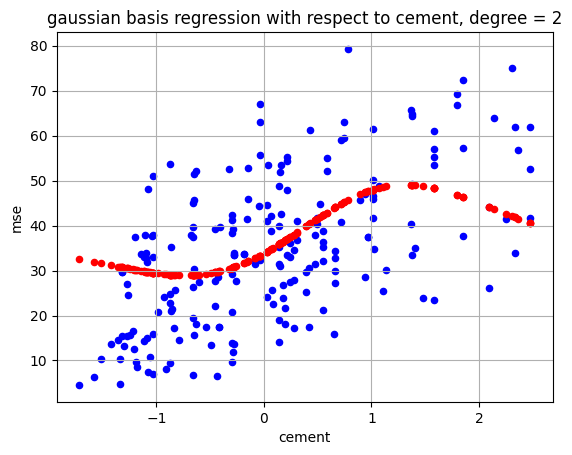

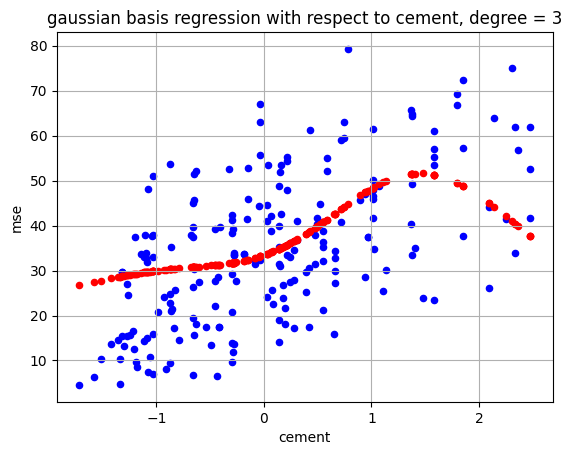

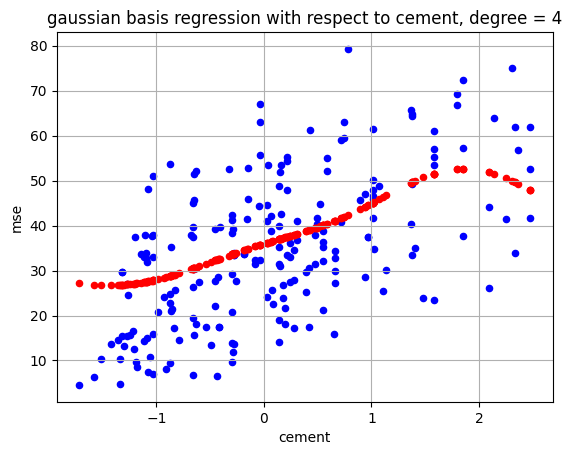

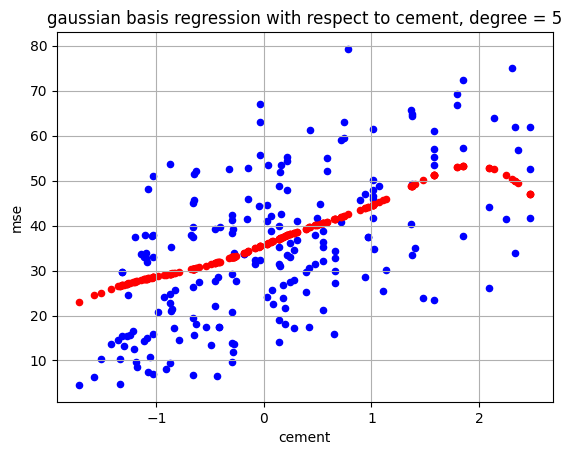

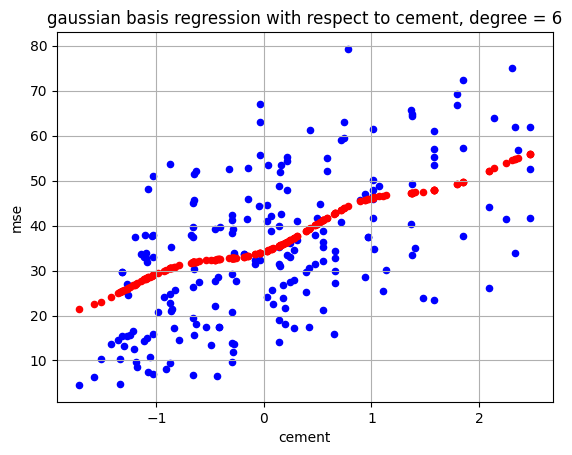

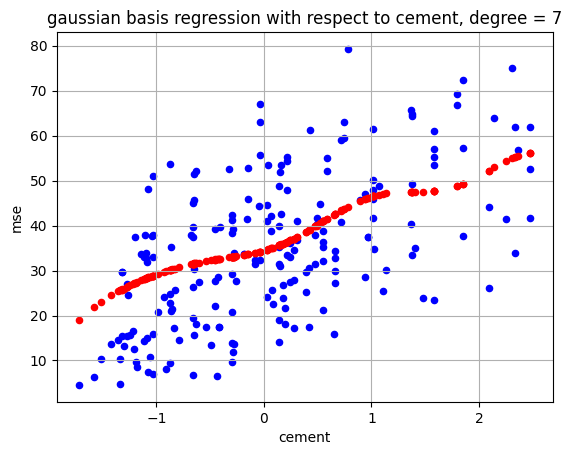

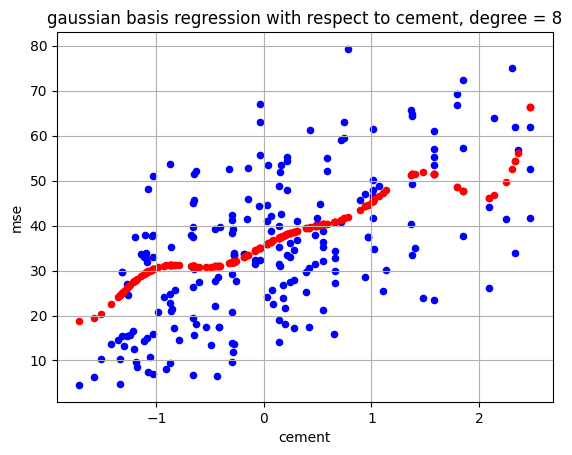

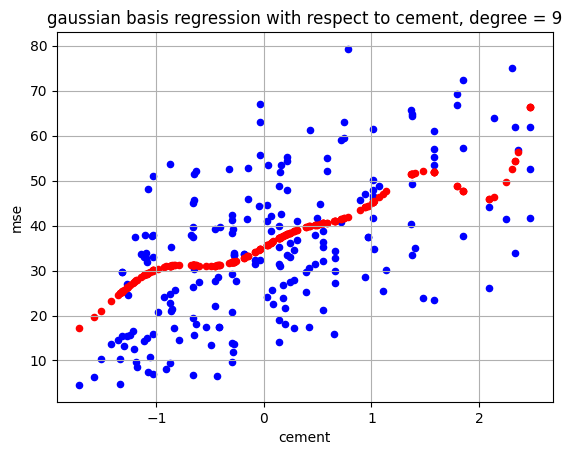

In [80]:
# (b) Gaussian Basis Regression
def create_gaussian_design_matrix(x, degree, sigma=1.0):
    """
    Create a design matrix using Gaussian basis functions.
    Args:
        x : numpy array of shape (n_samples,)
        degree : number of Gaussian basis functions
        sigma : width of the Gaussian functions
    Returns:
        X : design matrix with shape (n_samples, degree + 1) including bias term
    """
    n_samples = x.shape[0]
    X = np.ones((n_samples, degree + 1))
    
    # ----- Fill in Gaussian basis transformation -----
    # TODO: Fill in the loop to compute Gaussian basis functions
    for j in range(1, degree + 1):
        mu = j / (degree + 1)
        X[:, j] = np.exp(-0.5 * ((x - mu) ** 2) / sigma**2)
    
    return X

# For simplicity, use one feature (the first column) from the training set
x_train_feature = X_train[:, 0]
x_test_feature = X_test[:, 0]

gaussian_degrees = [i for i in range(10)]
gauss_train_errors = []
gauss_test_errors = []

for degree in gaussian_degrees:
    X_train_gauss = create_gaussian_design_matrix(x_train_feature, degree, sigma=1.0)
    X_test_gauss = create_gaussian_design_matrix(x_test_feature, degree, sigma=1.0)

    # --- Fit Gaussian basis regression model and evaluate performance ---
    # TODO:
    # - Initialize and train LinearRegression model
    # - Predict on both training and test sets
    # - Compute train and test MSE
    # - Append errors to respective lists

    model_gauss = LinearRegression()
    model_gauss.fit(X_train_gauss, y_train)
    y_train_pred = model_gauss.predict(X_train_gauss)
    y_test_pred = model_gauss.predict(X_test_gauss)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    gauss_train_errors.append(train_mse)
    gauss_test_errors.append(test_mse)
    print(test_mse, degree)
    print(f'train_mse: {train_mse:.6f}, test_mse: {test_mse:.6f}, degree: {degree}')

    plt.figure()
    plt.scatter(x_test_feature.T, y_test.T, color='b', edgecolor='b', label='label : 1', s=20)
    plt.scatter(x_test_feature.T, y_test_pred.T, color='r', edgecolor='r', label='label : 1', s=20)
    plt.xlabel('cement')
    plt.ylabel('mse')
    plt.title('gaussian basis regression with respect to cement, degree = %d' %(degree))
    plt.grid(True)

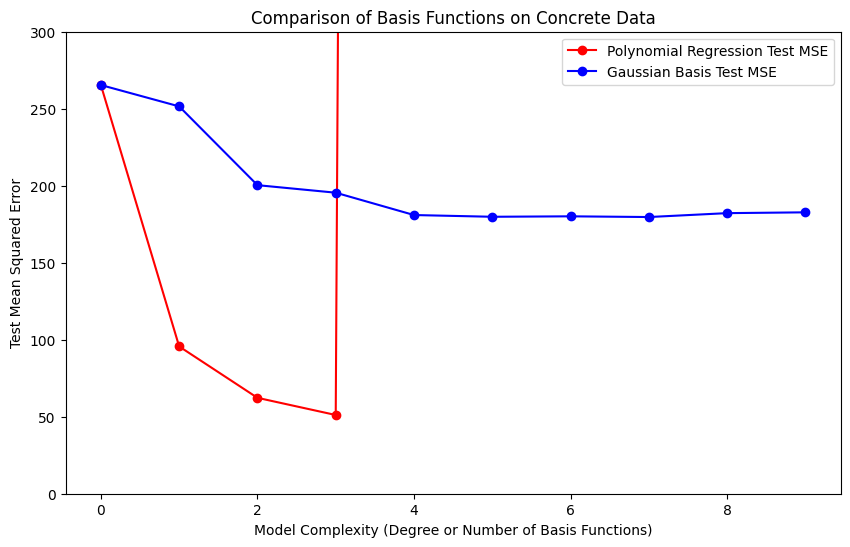

In [81]:
# Plot comparison of test errors
plt.figure(figsize=(10, 6))
plt.plot(degrees, poly_test_errors, 'ro-', label='Polynomial Regression Test MSE')
plt.plot(gaussian_degrees, gauss_test_errors, 'bo-', label='Gaussian Basis Test MSE')
plt.xlabel('Model Complexity (Degree or Number of Basis Functions)')
plt.ylabel('Test Mean Squared Error')
plt.ylim(0, 300)
plt.title('Comparison of Basis Functions on Concrete Data')
plt.legend()
plt.show()



bias^2: 265.384493, variance: 2.880987, degree: 0
bias^2: 96.116206, variance: 13.667048, degree: 1
bias^2: 71.933307, variance: 111.297095, degree: 2
bias^2: 1709.382697, variance: 12894.350314, degree: 3
bias^2: 215719.113991, variance: 9043489.948110, degree: 4
bias^2: 494644.056471, variance: 8008947.449685, degree: 5
bias^2: 1948464.510731, variance: 33529640.711506, degree: 6
bias^2: 10180054.274284, variance: 164418416.660962, degree: 7
bias^2: 45015453.926723, variance: 846784510.289489, degree: 8
bias^2: 314633550.534250, variance: 4544245921.471731, degree: 9


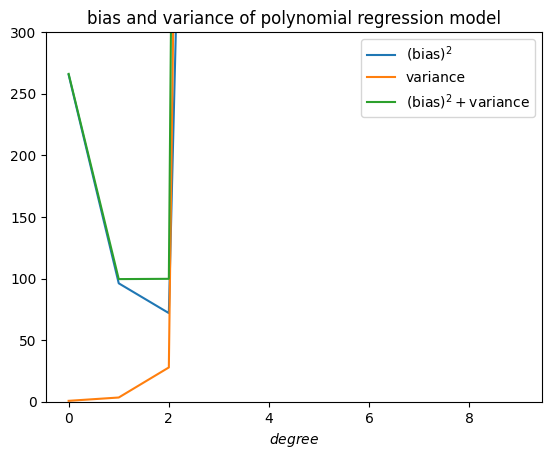

[2.66104740e+02 9.95329681e+01 9.97575802e+01 4.93297028e+03
 2.47659160e+06 2.49688092e+06 1.03308747e+07 5.12846584e+07
 2.56711581e+08 1.45069503e+09]


In [82]:
# (c) Polynomial Regression - Bias-Variance
# X_train has 1030 * 0.8 = 824 samples
# 824 has 1, 2, 4, 206, 412, 824 as a divisor
# So here, we will divide X_train into four sets and do training to observe
# properties of bias and variance
from numpy.linalg import norm

sample_size = 206
n_models = 4
np.random.seed(690)

indices = np.arange(len(X_train))
np.random.shuffle(indices)
X_train_shuffle = X_train[indices]
y_train_shuffle = y_train[indices]

degrees = [i for i in range(10)]
bias = []
variance = []

for degree in degrees:
    avg_y = np.zeros(sample_size)
    models = []
    for i in range(n_models):
        X_train_tmp = X_train_shuffle[i*sample_size:(i+1)*sample_size]
        y_train_tmp = y_train_shuffle[i*sample_size:(i+1)*sample_size]
        # ----- Blank : Transform features into polynomial features -----
        # Create a PolynomialFeatures object with the given degree (include bias term)
        # Transform both the training and test data

        # TODO : Fill in the code below
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train_tmp)
        X_test_poly = poly.fit_transform(X_test)
    
        # ----- Blank : Fit linear regression model and evaluate performance -----
        # TODO :
        # - Initialize and train LinearRegression model
        # - Predict on both training and test sets
        # - Compute train and test MSE
        # - Append errors to respective lists

        model_poly = LinearRegression()
        model_poly.fit(X_train_poly, y_train_tmp)
        y_train_pred = model_poly.predict(X_train_poly)
        y_test_pred = model_poly.predict(X_test_poly)
        avg_y = avg_y + y_test_pred
        models.append(y_test_pred)
    
    avg_y = avg_y / n_models

    bias_val = norm(avg_y - y_test) ** 2 / len(y_test)
    bias.append(bias_val)

    var_val = 0
    for y_test_pred in models:
        var_val = var_val + (norm(avg_y - y_test_pred) ** 2 / len(y_test))
    variance.append(var_val / n_models)

    print(f'bias^2: {bias_val:.6f}, variance: {var_val:.6f}, degree: {degree}')

plt.plot(degrees, bias, label='(bias)$^{2}$')
plt.plot(degrees, variance, label='variance')
plt.plot(degrees, np.array(bias) + np.array(variance), label='(bias)$^{2} + $variance')
plt.xlabel('$degree$')
plt.title('bias and variance of polynomial regression model')
plt.ylim(0, 300)
plt.legend()
plt.show()
print(np.array(bias) + np.array(variance))

bias^2: 265.384493, variance: 2.880987, degree: 0
bias^2: 251.495030, variance: 8.424983, degree: 1
bias^2: 200.428302, variance: 10.280117, degree: 2
bias^2: 195.596321, variance: 10.482869, degree: 3
bias^2: 181.264905, variance: 11.390703, degree: 4
bias^2: 180.482128, variance: 13.985696, degree: 5
bias^2: 180.606462, variance: 12.902668, degree: 6
bias^2: 180.216002, variance: 13.784362, degree: 7
bias^2: 182.810545, variance: 13.250499, degree: 8
bias^2: 183.112245, variance: 15.095283, degree: 9
bias^2: 182.657115, variance: 20.568765, degree: 10
bias^2: 182.657415, variance: 20.566453, degree: 11
bias^2: 182.657833, variance: 20.563901, degree: 12
bias^2: 182.658005, variance: 20.562798, degree: 13
bias^2: 182.658238, variance: 20.561257, degree: 14


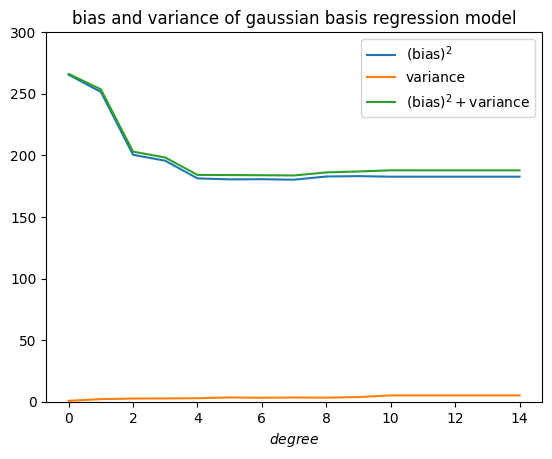

In [83]:
# (d) Gaussian Basis Regression - Bias-Variance
# X_train has 1030 * 0.8 = 824 samples
# 824 has 1, 2, 4, 206, 412, 824 as a divisor
# So here, we will divide X_train into four sets and do training to observe
# properties of bias and variance
from numpy.linalg import norm

sample_size = 206
n_models = 4
np.random.seed(690)

indices = np.arange(len(X_train))
np.random.shuffle(indices)
X_train_shuffle = X_train[indices]
y_train_shuffle = y_train[indices]

X_train_feature_shuffle = X_train_shuffle[:, 0]
X_test_feature = X_test[:, 0]

degrees = [i for i in range(15)]
bias = []
variance = []

for degree in degrees:
    avg_y = np.zeros(sample_size)
    models = []
    X_test_gauss = create_gaussian_design_matrix(x_test_feature, degree, sigma=1.0)
    for i in range(n_models):
        x_train_feature_tmp = X_train_feature_shuffle[i*sample_size:(i+1)*sample_size]
        X_train_gauss_tmp = create_gaussian_design_matrix(x_train_feature_tmp, degree, sigma=1.0)
        y_train_tmp = y_train_shuffle[i*sample_size:(i+1)*sample_size]
        # --- Fit Gaussian basis regression model and evaluate performance ---
        # TODO:
        # - Initialize and train LinearRegression model
        # - Predict on both training and test sets
        # - Compute train and test MSE
        # - Append errors to respective lists
        
        model_gauss = LinearRegression()
        model_gauss.fit(X_train_gauss_tmp, y_train_tmp)
        y_train_pred = model_gauss.predict(X_train_gauss_tmp)
        y_test_pred = model_gauss.predict(X_test_gauss)
        avg_y = avg_y + y_test_pred
        models.append(y_test_pred)
    
    avg_y = avg_y / n_models

    bias_val = norm(avg_y - y_test) ** 2 / len(y_test)
    bias.append(bias_val)

    var_val = 0
    for y_test_pred in models:
        var_val = var_val + (norm(avg_y - y_test_pred) ** 2 / len(y_test))
    variance.append(var_val / n_models)

    print(f'bias^2: {bias_val:.6f}, variance: {var_val:.6f}, degree: {degree}')

plt.plot(degrees, bias, label='(bias)$^{2}$')
plt.plot(degrees, variance, label='variance')
plt.plot(degrees, np.array(bias) + np.array(variance), label='(bias)$^{2} + $variance')
plt.xlabel('$degree$')
plt.title('bias and variance of gaussian basis regression model')
plt.ylim(0, 300)
plt.legend()
plt.show()

80.45583162122608


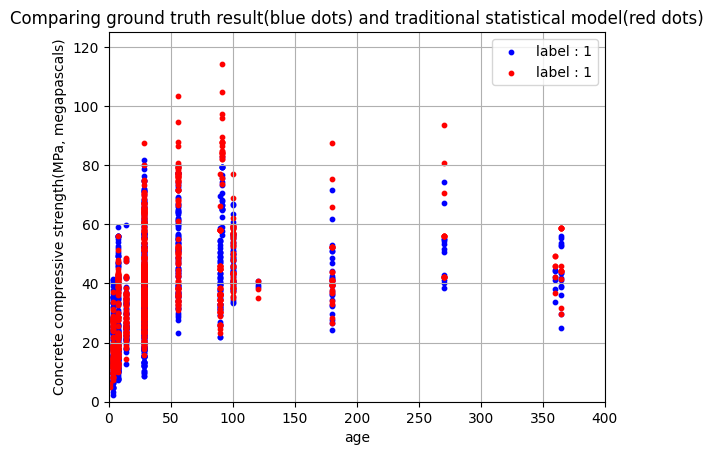

In [84]:
# (e) For real-world applicability analysis
# Baseline predictor based on the original paper:
# "Modeling of strength of high-performance concrete using artificial neural networks"
# I-Cheng Yeh, Cement and Concrete Research, Volume 28, Issue 12, 1998, Pages 1797-1808
# https://doi.org/10.1016/S0008-8846(98)00165-3
X_binder = X_cement + X_fly_ash + X_blast_furnace_slag
X_water_to_binder_ratio = X_water / X_binder
baseline = 13.859 * (X_water_to_binder_ratio ** -1.2749) * (0.2583 * np.log(X_age) + 0.1377)

plt.figure()
plt.scatter(X_age.T, y.T, color='b', edgecolor='b', label='label : 1', s=10)
plt.scatter(X_age.T, baseline.T, color='r', edgecolor='r', label='label : 1', s=10)
plt.xlim(0, 400)
plt.ylim(0, 125)
plt.xlabel('age')
plt.ylabel('Concrete compressive strength(MPa, megapascals)')
plt.title('Comparing ground truth result(blue dots) and traditional statistical model(red dots)')
plt.grid(True)
plt.legend()

baseline_mse = mean_squared_error(y, baseline)
print(baseline_mse)



train_mse and test_mse of polynomial regression model with respect to water to binder ratio
train_mse: 282.264844, test_mse: 265.384493, degree: 0
train_mse: 281.195346, test_mse: 265.121755, degree: 1
train_mse: 280.747478, test_mse: 265.065426, degree: 2
train_mse: 280.543238, test_mse: 265.210912, degree: 3
train_mse: 277.447470, test_mse: 289.709754, degree: 4
train_mse: 277.420046, test_mse: 276.107160, degree: 5
train_mse: 276.635912, test_mse: 1464.288870, degree: 6
train_mse: 274.155853, test_mse: 96655.214722, degree: 7
train_mse: 274.132815, test_mse: 224879.813521, degree: 8
train_mse: 269.577374, test_mse: 156937829.779835, degree: 9


train_mse and test_mse of polynomial regression model with respect to cement
train_mse: 282.264844, test_mse: 265.384493, degree: 0
train_mse: 217.840736, test_mse: 178.521957, degree: 1
train_mse: 217.835184, test_mse: 178.668677, degree: 2
train_mse: 217.835134, test_mse: 178.671820, degree: 3
train_mse: 217.746072, test_mse: 177.955843, de

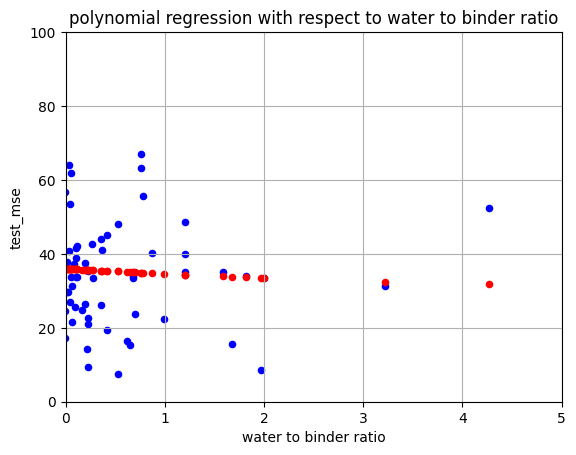

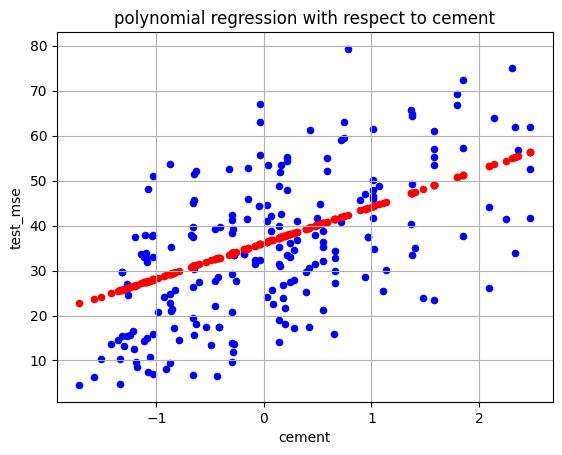

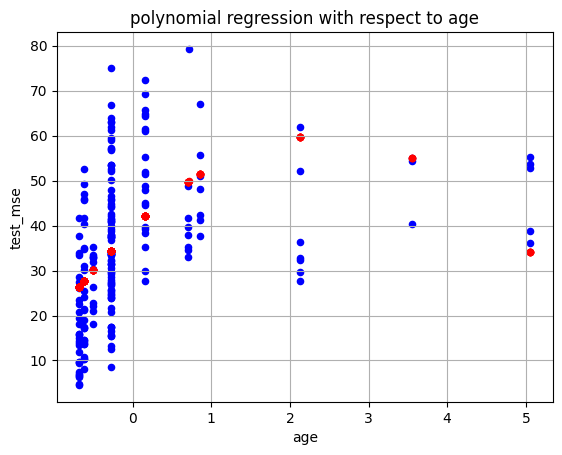

In [85]:
# (f) Polynomial Regression
degrees = [i for i in range(10)]
poly_train_errors = []
poly_test_errors = []

X_train_binder = X_train[:, 0] + X_train[:, 1] + X_train[:, 2]
X_train_water_to_binder_ratio = X_train[:, 3] / X_train_binder
X_train_water_to_binder_ratio_scaled = scaler.fit_transform(X_train_water_to_binder_ratio.reshape(-1, 1))

X_test_binder = X_test[:, 0] + X_test[:, 1] + X_test[:, 2]
X_test_water_to_binder_ratio = X_test[:, 3] / X_test_binder
X_test_water_to_binder_ratio_scaled = scaler.fit_transform(X_test_water_to_binder_ratio.reshape(-1, 1))

print('train_mse and test_mse of polynomial regression model with respect to water to binder ratio')
for degree in degrees:
    # ----- Blank : Transform features into polynomial features -----
    # Create a PolynomialFeatures object with the given degree (include bias term)
    # Transform both the training and test data

    # TODO : Fill in the code below
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train_water_to_binder_ratio_scaled.reshape(-1, 1))
    X_test_poly = poly.fit_transform(X_test_water_to_binder_ratio_scaled.reshape(-1, 1))
    
    # ----- Blank : Fit linear regression model and evaluate performance -----
    # TODO :
    # - Initialize and train LinearRegression model
    # - Predict on both training and test sets
    # - Compute train and test MSE
    # - Append errors to respective lists

    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)
    y_train_pred = model_poly.predict(X_train_poly)
    y_test_pred = model_poly.predict(X_test_poly)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    poly_train_errors.append(train_mse)
    poly_test_errors.append(test_mse)
    print(f'train_mse: {train_mse:.6f}, test_mse: {test_mse:.6f}, degree: {degree}')
    if(degree == 2):
        plt.figure()
        plt.scatter(X_test_water_to_binder_ratio_scaled.T, y_test.T, color='b', edgecolor='b', label='label : 1', s=20)
        plt.scatter(X_test_water_to_binder_ratio_scaled.T, y_test_pred.T, color='r', edgecolor='r', label='label : 1', s=20)
        plt.grid(True)
        plt.xlim(0, 5)
        plt.ylim(0, 100)
        plt.xlabel('water to binder ratio')
        plt.ylabel('test_mse')
        plt.title('polynomial regression with respect to water to binder ratio')

print('\n')
print('train_mse and test_mse of polynomial regression model with respect to cement')
for degree in degrees:
    # ----- Blank : Transform features into polynomial features -----
    # Create a PolynomialFeatures object with the given degree (include bias term)
    # Transform both the training and test data

    # TODO : Fill in the code below
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train[:, 0].reshape(-1, 1))
    X_test_poly = poly.fit_transform(X_test[:, 0].reshape(-1, 1))
    
    # ----- Blank : Fit linear regression model and evaluate performance -----
    # TODO :
    # - Initialize and train LinearRegression model
    # - Predict on both training and test sets
    # - Compute train and test MSE
    # - Append errors to respective lists

    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)
    y_train_pred = model_poly.predict(X_train_poly)
    y_test_pred = model_poly.predict(X_test_poly)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    poly_train_errors.append(train_mse)
    poly_test_errors.append(test_mse)
    print(f'train_mse: {train_mse:.6f}, test_mse: {test_mse:.6f}, degree: {degree}')
    if(degree == 2):
        plt.figure()
        plt.scatter(X_test[:, 0].T, y_test.T, color='b', edgecolor='b', label='label : 1', s=20)
        plt.scatter(X_test[:, 0].T, y_test_pred.T, color='r', edgecolor='r', label='label : 1', s=20)
        plt.xlabel('cement')
        plt.ylabel('test_mse')
        plt.title('polynomial regression with respect to cement')        
        plt.grid(True)

print('\n')
print('train_mse and test_mse of polynomial regression model with respect to age')
for degree in degrees:
    # ----- Blank : Transform features into polynomial features -----
    # Create a PolynomialFeatures object with the given degree (include bias term)
    # Transform both the training and test data

    # TODO : Fill in the code below
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train[:, 7].reshape(-1, 1))
    X_test_poly = poly.fit_transform(X_test[:, 7].reshape(-1, 1))
    
    # ----- Blank : Fit linear regression model and evaluate performance -----
    # TODO :
    # - Initialize and train LinearRegression model
    # - Predict on both training and test sets
    # - Compute train and test MSE
    # - Append errors to respective lists

    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)
    y_train_pred = model_poly.predict(X_train_poly)
    y_test_pred = model_poly.predict(X_test_poly)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    poly_train_errors.append(train_mse)
    poly_test_errors.append(test_mse)
    if(degree == 2):
        plt.figure()
        plt.scatter(X_test[:, 7].T, y_test.T, color='b', edgecolor='b', label='label : 1', s=20)
        plt.scatter(X_test[:, 7].T, y_test_pred.T, color='r', edgecolor='r', label='label : 1', s=20)
        plt.xlabel('age')
        plt.ylabel('test_mse')
        plt.title('polynomial regression with respect to age')
        plt.grid(True)

In [86]:
# (g) Polynomial Regression
from sklearn.linear_model import Ridge
degrees = [i for i in range(10)]
lambdas = [0.1, 1, 10, 100, 1000]
poly_train_errors = []
poly_test_errors = []

for lambda_ in lambdas:
    print('\n')
    print('lambda: %f' %(lambda_))
    for degree in degrees:
        # ----- Blank : Transform features into polynomial features -----
        # Create a PolynomialFeatures object with the given degree (include bias term)
        # Transform both the training and test data

        # TODO : Fill in the code below
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.fit_transform(X_test)
        
        # ----- Blank : Fit linear regression model and evaluate performance -----
        # TODO :
        # - Initialize and train LinearRegression model
        # - Predict on both training and test sets
        # - Compute train and test MSE
        # - Append errors to respective lists

        model_ridge = Ridge(alpha=lambda_)
        model_ridge.fit(X_train_poly, y_train)
        y_train_pred = model_ridge.predict(X_train_poly)
        y_test_pred = model_ridge.predict(X_test_poly)
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        poly_train_errors.append(train_mse)
        poly_test_errors.append(test_mse)
        print(f'train_mse: {train_mse:.6f}, test_mse: {test_mse:.6f}, degree: {degree}')
    



lambda: 0.100000
train_mse: 282.264844, test_mse: 265.384493, degree: 0
train_mse: 110.345579, test_mse: 95.628093, degree: 1
train_mse: 51.818361, test_mse: 62.081674, degree: 2
train_mse: 19.483510, test_mse: 49.541735, degree: 3
train_mse: 6.434078, test_mse: 50.659232, degree: 4
train_mse: 3.325121, test_mse: 467.859250, degree: 5
train_mse: 2.276613, test_mse: 4001.785072, degree: 6
train_mse: 1.836826, test_mse: 6778.921119, degree: 7
train_mse: 1.517423, test_mse: 808447.063702, degree: 8
train_mse: 1.348801, test_mse: 1640376.776775, degree: 9


lambda: 1.000000
train_mse: 282.264844, test_mse: 265.384493, degree: 0
train_mse: 110.352805, test_mse: 95.571463, degree: 1
train_mse: 52.101743, test_mse: 61.588695, degree: 2
train_mse: 20.300578, test_mse: 44.791848, degree: 3
train_mse: 8.541747, test_mse: 32.468834, degree: 4
train_mse: 4.577851, test_mse: 109.413443, degree: 5
train_mse: 3.269920, test_mse: 124.815561, degree: 6
train_mse: 2.693473, test_mse: 844.476537, degre

In [87]:
# (h) Fourier Regression
def create_fourier_design_matrix(x, degree, k):
    """
    Create a design matrix using Fourier basis functions.
    Args:
        x : numpy array of shape (n_samples,)
        degree : number of Fourier basis functions
        k : wave number
    Returns:
        X : design matrix with shape (n_samples, degree + 1) including bias term
    """
    n_samples = x.shape[0]
    X = np.ones((n_samples, degree + 1))
    
    # ----- Fill in Gaussian basis transformation -----
    # TODO: Fill in the loop to compute Gaussian basis functions
    for j in range(1, degree + 1):
        X[:, j] = np.cos(j * k * np.pi * x)
    
    return X

# For simplicity, use one feature (the first column) from the training set
x_train_feature = X_train[:, 0]
x_test_feature = X_test[:, 0]

ks = [0.1, 0.2, 0.3, 0,4, 0.5]
fourier_degrees = [i for i in range(100)]
fourier_train_errors = []
fourier_test_errors = []

for k in ks:
    print('\n')
    print('k: %f' %(k))
    for degree in fourier_degrees:
        X_train_fourier = create_fourier_design_matrix(x_train_feature, degree, k)
        X_test_fourier= create_fourier_design_matrix(x_test_feature, degree, k)

        # --- Fit Gaussian basis regression model and evaluate performance ---
        # TODO:
        # - Initialize and train LinearRegression model
        # - Predict on both training and test sets
        # - Compute train and test MSE
        # - Append errors to respective lists
        model_fourier = LinearRegression()
        model_fourier.fit(X_train_fourier, y_train)
        y_train_pred = model_fourier.predict(X_train_fourier)
        y_test_pred = model_fourier.predict(X_test_fourier)
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        fourier_train_errors.append(train_mse)
        fourier_test_errors.append(test_mse)
        print(f'train_mse: {train_mse:.6f}, test_mse: {test_mse:.6f}, degree: {degree}')

        # plt.figure()
        # plt.scatter(x_test_feature.T, y_test.T, color='b', edgecolor='b', label='label : 1', s=20)
        # plt.scatter(x_test_feature.T, y_test_pred.T, color='r', edgecolor='r', label='label : 1', s=20)
        # plt.xlabel('cement')
        # plt.ylabel('mse')
        # plt.title('fourier basis regression with respect to cement, degree = %d' %(degree))
        # plt.grid(True)



k: 0.100000
train_mse: 282.264844, test_mse: 265.384493, degree: 0
train_mse: 271.813149, test_mse: 252.375773, degree: 1
train_mse: 264.267778, test_mse: 244.973610, degree: 2
train_mse: 264.267774, test_mse: 244.963471, degree: 3
train_mse: 264.217387, test_mse: 244.720709, degree: 4
train_mse: 262.344853, test_mse: 244.898648, degree: 5
train_mse: 262.321467, test_mse: 245.134580, degree: 6
train_mse: 261.835107, test_mse: 241.666546, degree: 7
train_mse: 259.754191, test_mse: 238.934995, degree: 8
train_mse: 258.621384, test_mse: 238.387850, degree: 9
train_mse: 258.568935, test_mse: 238.276404, degree: 10
train_mse: 258.198410, test_mse: 236.603694, degree: 11
train_mse: 258.257284, test_mse: 236.710154, degree: 12
train_mse: 258.310700, test_mse: 236.842370, degree: 13
train_mse: 255.347298, test_mse: 241.604150, degree: 14
train_mse: 255.244841, test_mse: 241.510283, degree: 15
train_mse: 254.954181, test_mse: 240.584193, degree: 16
train_mse: 254.992118, test_mse: 240.696391,